In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, cauchy
import math

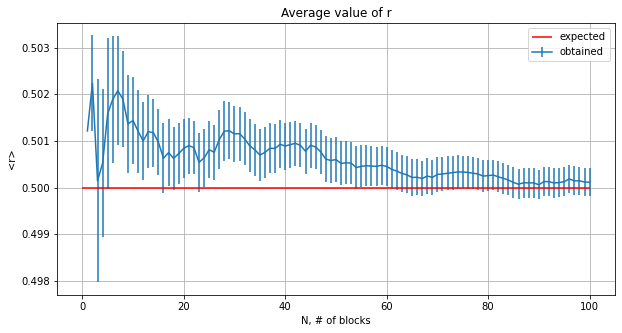

In [2]:
fig=plt.figure(figsize=(10,5))

N, r, error = np.loadtxt("build/results01.1.1.dat", usecols=(0,1,2), delimiter=" ", unpack=True)
plt.errorbar(N,r,yerr=error, label='obtained')
plt.xlabel('N, # of blocks')
plt.ylabel('<r>')
plt.title("Average value of r")
plt.hlines(0.5, 0, 100, color='red', label='expected')
plt.grid(True)
plt.legend()
plt.show()

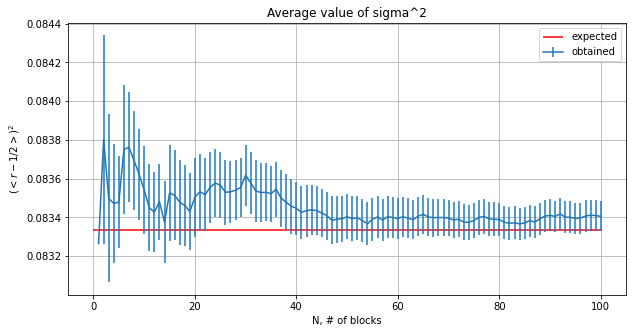

In [3]:
fig=plt.figure(figsize=(10,5))

N, r, error = np.loadtxt("build/results01.1.2.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.hlines(1./12, 0, 100, color='red', label='expected')
plt.errorbar(N,r,yerr=error, label='obtained')
plt.xlabel('N, # of blocks')
plt.legend()
plt.ylabel('$(<r-1/2>)^2$')
plt.title("Average value of sigma^2")
plt.grid(True)
plt.show()

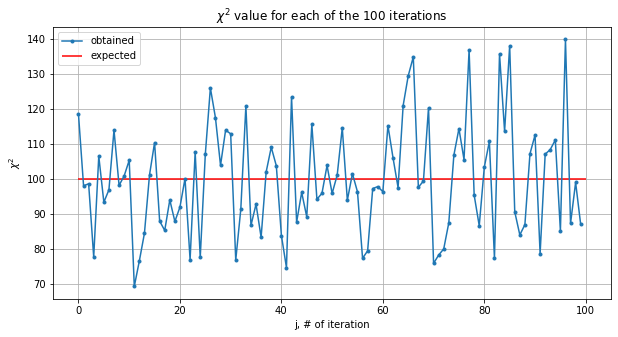

mean value =  99.66279999999999


In [4]:
chi =np.loadtxt("build/results01.1.3.dat", delimiter=' ', unpack=True)

fig=plt.figure(figsize=(10, 5))
plt.plot(chi, linestyle="-", marker=".", label='obtained')
plt.hlines(100, 0, 100, color='red', label='expected')
plt.xlabel('j, # of iteration')
plt.ylabel('$\chi^2$')
plt.legend()
plt.title('$\chi^2$ value for each of the 100 iterations')
plt.grid(True)
plt.show()
print("mean value = ", np.mean(chi))

Gaussian fit: 
 mean =  0.5000108001 
 std dev =  0.029037794697737294


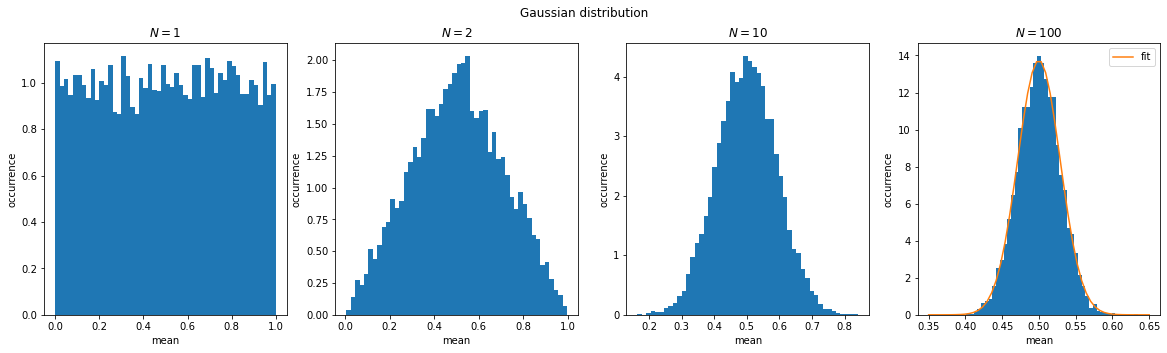

In [12]:
M=10000
graf= '1', '2', '10', '100'

fig=plt.figure(figsize=(20, 5))
plt.suptitle('Gaussian distribution')

for i in range(4):
    gaus = np.loadtxt("build/results01.2.gauss.dat", skiprows=i*M, max_rows=M, unpack= True)
    plt.subplot(1,4,i+1)
    plt.hist(gaus,50, density=True)
    plt.title(r'$N='+graf[i]+'$')
    plt.xlabel('mean')
    plt.ylabel('occurrence')
    plt.grid(False)
    if i==3 :
        parameter = norm.fit(gaus) 
        x = np.linspace(0.35, 0.65, 50) 
        y = norm.pdf(x, *parameter) 
        plt.plot(x, y, label='fit')
        plt.legend()

mu, std = norm.fit(gaus)

print("Gaussian fit: \n mean = ", mu, "\n std dev = ", std)

plt.show()

Gaussian fit: 
 mean =  0.9998264965999999 
 std dev =  0.09851158906206817


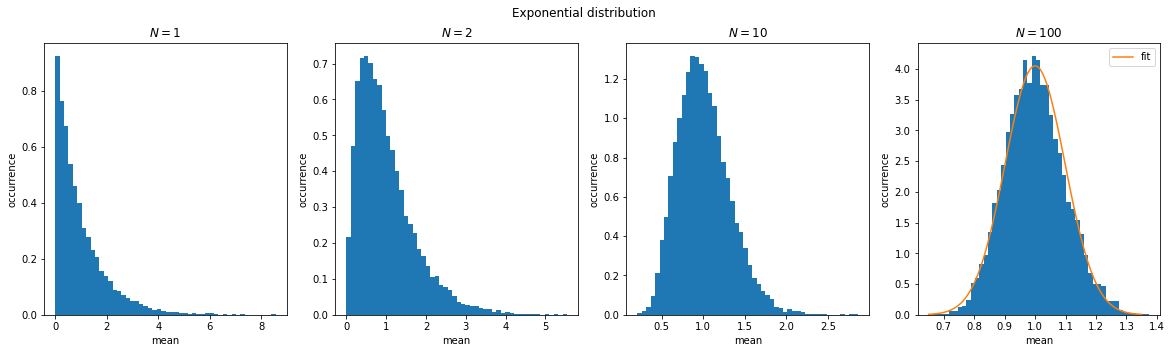

In [13]:
fig=plt.figure(figsize=(20, 5))
plt.suptitle('Exponential distribution')

for i in range(4):
    exp = np.loadtxt("build/results01.2.exp.dat", skiprows=i*M, max_rows=M, unpack= True)
    plt.subplot(1,4,i+1)
    plt.hist(exp,50, density=True)
    plt.title(r'$N='+graf[i]+'$')
    plt.xlabel('mean')
    plt.ylabel('occurrence')
    plt.grid(False)
    if i==3 :
        parameter = norm.fit(exp) 
        x = np.linspace(0.65, 1.35, 100) 
        y = norm.pdf(x, *parameter)
        plt.plot(x, y, label='fit')
        plt.legend()

mu, std = norm.fit(exp)

print("Gaussian fit: \n mean = ", mu, "\n std dev = ", std)

plt.show()

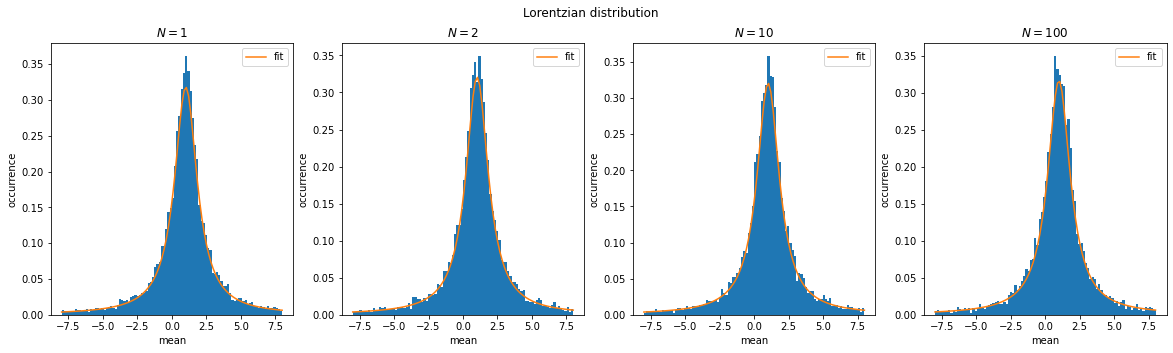

In [14]:
fig=plt.figure(figsize=(20, 5))
plt.suptitle('Lorentzian distribution')

for i in range(4):
    lor = np.loadtxt("build/results01.2.lorentz.dat", skiprows=i*M, max_rows=M, unpack= True)
    plt.subplot(1,4,i+1)
    plt.hist(lor,100, range=(-8,8), density=True)
    plt.title(r'$N='+graf[i]+'$')
    plt.xlabel('mean')
    plt.ylabel('occurrence')
    plt.grid(False)
    parameter = cauchy.fit(lor) 
    x = np.linspace(-8, 8, 100)
    y = cauchy.pdf(x, *parameter)
    plt.plot(x, y, label='fit')
    plt.legend()

plt.show()

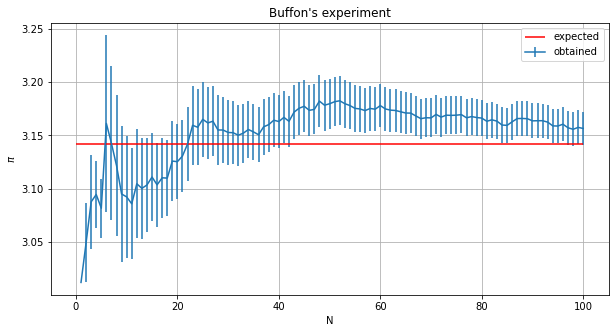

In [16]:
x,y,err=np.loadtxt("build/results01.3.dat",usecols=(0,1,2),unpack=True)

fig=plt.figure(figsize=(10, 5))
plt.errorbar(x,y,yerr=err, label='obtained')
plt.hlines(3.1415926, 0, 100, color='red', label='expected')
plt.xlabel('N')
plt.ylabel('$\pi$', )
plt.grid(True)
plt.title("Buffon's experiment")
plt.legend()
plt.show()